# Building Machine Learning Model for Predicting Employee Turnover 

As a machine learning specialist, you have been hired by a large corporation to help them analyze their employee data in order to better understand their workforce and make informed decisions related to employee retention, productivity, and engagement. 
The company has provided you with a dataset containing information on employee Education, JoiningYear, City, PaymentTier, Age, Gender, EverBenched, ExperienceInCurrentDomain, and LeaveOrNot. 

**The employee dataset includes the following features:**<br><br>
**• Education:** The level of education attained by the employee (e.g., high school, bachelor's degree, master's degree, etc.). 
<br>**• JoiningYear:** The year in which the employee joined the company. 
<br>**• City:** The city in which the employee is based. 
<br>**• PaymentTier:** The payment tier or salary bracket for the employee (e.g., entry-level, mid-level, senior-level, etc.). 
<br>**• Age:** The age of the employee. 
<br>**• Gender:** The gender of the employee. 
<br>**• EverBenched:** A binary indicator of whether the employee has ever been benched (i.e., temporarily removed from a project or assignment). 
<br>**• ExperienceInCurrentDomain:** The number of years of experience the employee has in their current field or domain. 
<br>**• LeaveOrNot:** A binary indicator of whether the employee has left the company. Your goal is to develop a machine learning model using logistic regression that can accurately predict whether an employee will leave or not (employee turnover) and identify the key drivers of employee engagement and productivity.<br>

**The goal of the machine learning project is to develop a logistic regression model** that can accurately predict whether an employee will leave the company or not based on the other variables in the dataset. In addition to developing the model, exploratory data analysis, data processing, data preprocessing, feature engineering and selection, modeling, and model optimization will be performed.

Therefore, in addition to developing the logistic regression model, you should also conduct exploratory data analysis to identify any patterns or trends in the data that may not be immediately apparent. You should use visualizations and statistical techniques to highlight important relationships and correlations in the data, and use this information to inform your model-building process.

Finally, perform model selection using cross-validation to determine which of the models (SVM, Random Forest, Gradient Boosting, KNN, & Naïve Bayes) performs best. 


In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Extracting Data

employee_df =  pd.read_csv('https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/employee.csv')
employee_df.head(10)

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   
5  Bachelors         2016  Bangalore            3   22    Male          No   
6  Bachelors         2015  New Delhi            3   38    Male          No   
7  Bachelors         2016  Bangalore            3   34  Female          No   
8  Bachelors         2016       Pune            3   23    Male          No   
9    Masters         2017  New Delhi            2   37    Male          No   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  
5                          0           0  
6                          0           0  
7                          2           1  
8                          1           0  
9                          2           0

# Exploring the information on the Dataset

In [3]:
employee_df.shape

(4653, 9)

In [4]:
employee_df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
# you can also use the method .dtypes to check the data types of each column

print(employee_df.dtypes)

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


NB: We can see that some columns have 'object' data types, which should <br>be converted to the appropriate data types for better processing and analysis. 

The .astype() method is used to convert the data type of a pandas Series or DataFrame column to a specified data type.<br>
It is important because machine learning algorithms typically require the data to be in a specific data type to work properly.<br> For example, if the data in a column is in string format, it may need to be converted to a numerical format before it can<br>be used in a machine learning algorithm.

<br> For this particular data, we can observe that 'Education', 'City', 'Gender', and 'EverBenched' have the categorical data types<br> so we are going to change their datatypes from object to category.

In [7]:
# Convert the data types of the columns in the employee_df to the right data types

# Convert 'Education', 'City', 'Gender', and 'EverBenched' to categorical data types
employee_df['Education'] = employee_df['Education'].astype('category')
employee_df['City'] = employee_df['City'].astype('category')
employee_df['Gender'] = employee_df['Gender'].astype('category')
employee_df['EverBenched'] = employee_df['EverBenched'].astype('category')

# You can then view the updated data types using the following code:
print(employee_df.dtypes)

Education                    category
JoiningYear                     int64
City                         category
PaymentTier                     int64
Age                             int64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain       int64
LeaveOrNot                      int64
dtype: object


In [8]:
# .isnull() Generates a boolean mask indicating which values are missing or null. 

employee_df.isnull().head(5)

Education  JoiningYear   City  PaymentTier    Age  Gender  EverBenched  \
0      False        False  False        False  False   False        False   
1      False        False  False        False  False   False        False   
2      False        False  False        False  False   False        False   
3      False        False  False        False  False   False        False   
4      False        False  False        False  False   False        False   

   ExperienceInCurrentDomain  LeaveOrNot  
0                      False       False  
1                      False       False  
2                      False       False  
3                      False       False  
4                      False       False

The .isnull().sum() method is used to calculate the number of missing values in a pandas DataFrame. <br>It is important because missing values can be problematic in machine learning projects, as many machine learning algorithms <br>cannot handle missing data.

By using the .isnull().sum() method, we can quickly determine the number of missing values in each <br>column of a DataFrame, which can help us decide how to handle missing values. 

In addition, the .isnull().sum() method can also help us identify data quality issues. If we notice<br> that certain columns have a large number of missing values, we may want to investigate why this is the case and take steps <br>to improve the data collection process in the future.

In [9]:
# Calculate the number of null values for each column in the employee_df DataFrame  
employee_df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

**NB: Duplicates can affect the performance of a model in several ways:**

**Bias:** If the duplicate data points represent a specific class or outcome disproportionately, the model may become biased towards that class, reducing its ability to generalize to new, unseen data.

**Overfitting:** Since duplicates essentially provide the model with redundant information, the model may learn to fit too closely to the noise in the training data, resulting in overfitting. This means the model will perform well on the training data but poorly on new, unseen data.

**Inaccurate performance evaluation:** If the duplicated data points are present in both the training and validation/test sets, the model's performance evaluation may be overly optimistic, as it has already seen the same data points during training.

**Wasted computational resources:** Training a model on a dataset with many duplicates can be inefficient, as the model may require more iterations to converge, wasting computational resources.

In general, it is a good practice to identify and remove duplicates from the dataset before splitting it into training and validation/test datasets. This ensures a more accurate representation of the underlying data distribution, reduces the risk of overfitting, and enables a more reliable performance evaluation.

The **Code below** identifies the rows in a pandas DataFrame employee_df that have duplicate values by <br>creating a new DataFrame duplicates that contains only the rows with duplicate values.

**employee_dff = employee_df[employee_df.duplicated()]:** 
<br>This line of code selects the rows in the DataFrame employee_df that have duplicate values. The duplicated() method of a pandas DataFrame returns a boolean Series, **where True indicates that the corresponding row in the DataFrame is a duplicate, and False means it is unique.** By using this boolean Series with the DataFrame's indexing operator [ ], it selects only the duplicate rows.


**By identifying and examining the rows with duplicate values, we can determine whether these duplicates<br> are a result of data entry errors or indicate a more systemic issue with the data. Depending on the situation, we may choose<br> to drop the duplicates, keep only the first occurrence of each row, or perform additional analysis to better understand
<br> the underlying causes of the duplicates.**

In [10]:
employee_dff = employee_df[employee_df.duplicated()]
print("Rows with duplicate values:")
employee_dff

Rows with duplicate values:


Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
111   Bachelors         2017       Pune            2   27  Female          No   
130   Bachelors         2017  Bangalore            3   26  Female          No   
138   Bachelors         2017  New Delhi            3   28    Male          No   
160   Bachelors         2014  Bangalore            3   28  Female          No   
167   Bachelors         2014  Bangalore            3   25    Male          No   
...         ...          ...        ...          ...  ...     ...         ...   
4640  Bachelors         2015  Bangalore            3   35    Male          No   
4642  Bachelors         2012  Bangalore            3   36  Female          No   
4646  Bachelors         2013  Bangalore            3   25  Female          No   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDomain  LeaveOrNot  
111                           5           1  
130                           4           0  
138                           2           0  
160                           3           0  
167                           3           0  
...                         ...         ...  
4640                          0           0  
4642                          4           0  
4646                          3           0  
4648                          4           0  
4652                          4           0  

[1889 rows x 9 columns]

The output above shows the number of duplicate rows in the dataset, which means 1889 rows have the exact same values for all columns as another row in the dataset. It is important to note that these duplicate rows might have been created due to data entry errors or other reasons.

NB: It is also importnat to note that duplicate rows in a dataset like this may not necessarily be errors, as they might represent different employees with the same characteristics.However, **you should verify if the dataset is expected to have unique identifiers or if the duplicates are expected.**

**This implies that whether or not to remove duplicates depends on the context and the nature of your dataset.
If you expect each row to represent a unique employee, and there should be no duplicates, then it's advisable to remove the duplicates.**

**This could be the case if there is a unique identifier for each employee (e.g., employee ID) that is missing from the dataset, or if it's unlikely for multiple employees to have identical values across all columns.**

**On the other hand, if the dataset is expected to have multiple employees with the same characteristics, then removing duplicates might lead to loss of information. In this case, you should keep the duplicates.**

Before making a decision, you should carefully examine the dataset and consult with domain experts or the data provider to understand the nature of the data and any constraints or expectations.


In [11]:
# Checking the shape in the employee_df DataFrame
employee_df.shape

(4653, 9)

In [12]:
# Find duplicate rows in the employee_df DataFrame
duplicates = employee_df.duplicated()

# Count the number of duplicate rows
duplicate_rows_count = duplicates.sum()

# Print the number of duplicate rows
print("Number of duplicate rows in the dataset:", duplicate_rows_count)


Number of duplicate rows in the dataset: 1889


Removing duplicates has reduced the dataset size from 4653 rows to 2764 rows. **This is a significant reduction (around 40% of the original dataset), so it's essential to consider the implications of removing duplicates before proceeding.**

As mentioned earlier, you need to understand the data collection process and domain knowledge before deciding whether to remove duplicates. If the duplicates are likely to be caused by data entry errors or other issues, removing them may lead to a more reliable model.

**However, if the duplicates are expected in the dataset (e.g., different employees can have the same set of attributes), you should be cautious about removing them.** In this case, you may end up losing valuable information by removing the duplicates, which could negatively affect your model's performance.

**NB: For this Use Case, we will remove dublicates from the dataset**

In [13]:
employee_df = employee_df[~employee_df.duplicated()]
employee_df.duplicated().sum()

0

The code above is used to remove duplicate rows from a DataFrame employee_df. The duplicated() method of a pandas DataFrame returns a boolean Series, where True indicates that the corresponding row in the DataFrame is a duplicate, and False means it is unique.

The **~ operator** in front of **employee_df.duplicated()** is a bitwise negation, which inverts the boolean values in the Series. So, True values become False, and False values become True. **By using this negation with the DataFrame's indexing operator [ ], it selects only the unique rows, effectively filtering out the duplicates.**

After this operation, employee_df will contain only unique rows, with all duplicates removed.

In [14]:
#checking the size of the new dataframe
employee_df.shape

(2764, 9)

In [15]:
# Identifying the unique values in ['Education','City','Gender','EverBenched'] in alphabetical order.

for categories in ['Education','City','Gender','EverBenched', 'PaymentTier']:
    print(categories)
    print(employee_df[categories].sort_values().unique())
    print('\n')

Education
['Bachelors', 'Masters', 'PHD']
Categories (3, object): ['Bachelors', 'Masters', 'PHD']


City
['Bangalore', 'New Delhi', 'Pune']
Categories (3, object): ['Bangalore', 'New Delhi', 'Pune']


Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


EverBenched
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


PaymentTier
[1 2 3]




# Exploratory Data Analysis (Understanding the Data)

It is a important step in the data analysis process that involves **understanding, summarizing, and visualizing the data** to gain insights and make informed decisions. EDA helps analysts and data scientists get a better understanding of the data, its structure, and its relationships before proceeding with more advanced techniques like feature engineering, model building, and validation.

**Computing Summary Statistics for the Data**<br><br>
**Both employee_df.describe(include='all') and employee_df.describe() are methods to generate summary statistics of a pandas DataFrame.** <br>The difference between them lies in the type of columns they consider when generating the summary statistics.

**employee_df.describe(include='all'):** This method provides summary statistics for all columns in the DataFrame, including both numerical and categorical columns (object type and other non-numeric types). It returns a summary table that contains count, unique, top, and frequency for categorical columns, and count, mean, standard deviation, minimum, quartiles, and maximum for numerical columns. By specifying include='all', you request summary statistics for all columns, irrespective of their data types.

**employee_df.describe():** This method, without any additional arguments, provides summary statistics only for numerical columns in the DataFrame. It returns a summary table that includes count, mean, standard deviation, minimum, quartiles, and maximum for the numerical columns. Categorical columns are excluded by default.

In [16]:
#Descriptive statistics
employee_df.describe(include='all')

Education  JoiningYear       City  PaymentTier          Age Gender  \
count        2764  2764.000000       2764  2764.000000  2764.000000   2764   
unique          3          NaN          3          NaN          NaN      2   
top     Bachelors          NaN  Bangalore          NaN          NaN   Male   
freq         1971          NaN       1171          NaN          NaN   1529   
mean          NaN  2015.090449        NaN     2.636035    30.952967    NaN   
std           NaN     1.885943        NaN     0.624001     5.108872    NaN   
min           NaN  2012.000000        NaN     1.000000    22.000000    NaN   
25%           NaN  2013.000000        NaN     2.000000    27.000000    NaN   
50%           NaN  2015.000000        NaN     3.000000    30.000000    NaN   
75%           NaN  2017.000000        NaN     3.000000    35.000000    NaN   
max           NaN  2018.000000        NaN     3.000000    41.000000    NaN   

       EverBenched  ExperienceInCurrentDomain   LeaveOrNot  
count         2764                2764.000000  2764.000000  
unique           2                        NaN          NaN  
top             No                        NaN          NaN  
freq          2403                        NaN          NaN  
mean           NaN                   2.644356     0.393632  
std            NaN                   1.610610     0.488643  
min            NaN                   0.000000     0.000000  
25%            NaN                   1.000000     0.000000  
50%            NaN                   2.000000     0.000000  
75%            NaN                   4.000000     1.000000  
max            NaN                   7.000000     1.000000

In [17]:
# Computing summary statistics for numeric variables
employee_df.describe()

JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  2764.000000  2764.000000  2764.000000                2764.000000   
mean   2015.090449     2.636035    30.952967                   2.644356   
std       1.885943     0.624001     5.108872                   1.610610   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     2.000000    27.000000                   1.000000   
50%    2015.000000     3.000000    30.000000                   2.000000   
75%    2017.000000     3.000000    35.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  2764.000000  
mean      0.393632  
std       0.488643  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

This report provides a descriptive analysis of employee data collected from the company, focusing on factors such as joining year, payment tier, age, experience in the current domain, and whether the employee has left the company or not. By examining these factors, we aim to identify patterns and trends that may help the company better understand employee attrition and inform their human resource management strategies.

**Key Observations:**

Employees have varying levels of experience in their current domain, with the average experience being 2.64 years. Most employees have between 1 and 4 years of experience in their domain.

**Age (mean = 30.95):**
The age of employees ranges from 22 to 41 years, with an average age of around 31 years. This indicates that the <br>workforce is relatively young, which could mean that the company is focused<br> on hiring employees with fresh ideas and perspectives.

**JoiningYear:** The majority of employees joined the company between 2013 and 2017. <br>This suggests that the company may have experienced a period of growth or increased hiring during these years. 

**LeaveOrNot:** The attrition rate in the dataset is 39.36%, which indicates that a significant proportion of employees have left the company. This may indicate potential issues with employee satisfaction, engagement, or retention. It is crucial to investigate the reasons behind this turnover rate and identify strategies to improve employee retention. 

**ExperienceInCurrentDomain (mean = 2.91):**
On average, employees have around 3 years of experience in their current domain. <br>This suggests that employees have a moderate amount of experience in their field, which could be a factor in their job satisfaction and retention.



In [18]:
# Calculate and display the count of employees in each payment tier
payment_tier_counts = employee_df['PaymentTier'].value_counts()
print(payment_tier_counts)

payment_tier_counts = employee_df['PaymentTier'].value_counts(normalize= True)
print(payment_tier_counts)

3    1976
2     570
1     218
Name: PaymentTier, dtype: int64
3    0.714906
2    0.206223
1    0.078871
Name: PaymentTier, dtype: float64


This implies that majority of employees (71.49%) belong to Payment Tier 3, indicating that a large proportion of the company's workforce is in the highest payment tier.

Payment Tier 2 accounts for 20.62% of the total employees, representing a moderate portion of the workforce.

Payment Tier 1 has the lowest number of employees (218) and constitutes 7.89% of the total employees. This suggests that the company has fewer employees in the lowest payment tier.

In [19]:
# Computing frequency distributions for categorical variables
print(employee_df['Education'].value_counts())
print(employee_df['JoiningYear'].value_counts())
print(employee_df['City'].value_counts())
print(employee_df['PaymentTier'].value_counts())
print(employee_df['Gender'].value_counts())
print(employee_df['EverBenched'].value_counts())
print(employee_df['LeaveOrNot'].value_counts())

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64
2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: JoiningYear, dtype: int64
Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64
3    1976
2     570
1     218
Name: PaymentTier, dtype: int64
Male      1529
Female    1235
Name: Gender, dtype: int64
No     2403
Yes     361
Name: EverBenched, dtype: int64
0    1676
1    1088
Name: LeaveOrNot, dtype: int64


# Data Visualization

# Univariate Analysis

Univariate analysis is the process of analyzing and visualizing a single variable at a time.<br> 
It allows you to explore the distribution, central tendency, and variability of the data <br>for each variable independently.

In [20]:
#get the categorical columns
categorical_columns = employee_df.select_dtypes(include='category').columns
print(categorical_columns)


Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')


The code belowcreates a bar chart that visualizes the count of values in the ‘Education’ column of the employee_df DataFrame.

In [21]:
# Define custom colors for each value in 'Education'
colors = ['#636EFA', '#EF553B', '#00CC96']

# Create a bar chart with custom colors
fig = px.bar(employee_df['Education'].value_counts().reset_index(), 
             x='index', y='Education', title='Education', color='index', 
             color_discrete_sequence=colors)

# Show the plot
fig.show()

The code below creates a bar chart that visualizes the count of values in the ‘City’ column of the employee_df DataFrame. 

In [22]:
# Define custom colors for each value in 'City'
colors = ['#FFA15A', '#FF6692', '#B6E880']

# Create a bar chart with custom colors
fig = px.bar(employee_df['City'].value_counts().reset_index(), x='index', y='City', 
             title='City', color='index', color_discrete_sequence=colors)

# Show the plot
fig.show()

The code below creates a bar chart that visualizes the count of values in the ‘Gender’ column of the employee_df DataFrame. 

In [23]:
#count of gender

# Define custom colors for each value in 'Gender'
colors = ['#636EFA', '#EF553B']

# Create a bar chart with custom colors
fig = px.bar(employee_df['Gender'].value_counts().reset_index(), x='index', 
             y='Gender', title='Gender', color='index', color_discrete_sequence=colors)

# Show the plot
fig.show()

The code below creates a bar chart that visualizes the count of values in the ‘EverBenched’ column of the employee_df DataFrame.

In [24]:
# Define custom colors for each value in 'EverBenched'
colors = ['#00CC96', '#AB63FA']

# Create a bar chart with custom colors
fig = px.bar(employee_df['EverBenched'].value_counts().reset_index(), 
             x='index', y='EverBenched', title='EverBenched', 
             color='index', color_discrete_sequence=colors)

# Show the plot
fig.show()

The code below creates four pie charts that visualize the distribution of values in the ‘Education’, ‘City’, ‘Gender’, and ‘EverBenched’ columns of the employee_df DataFrame. 

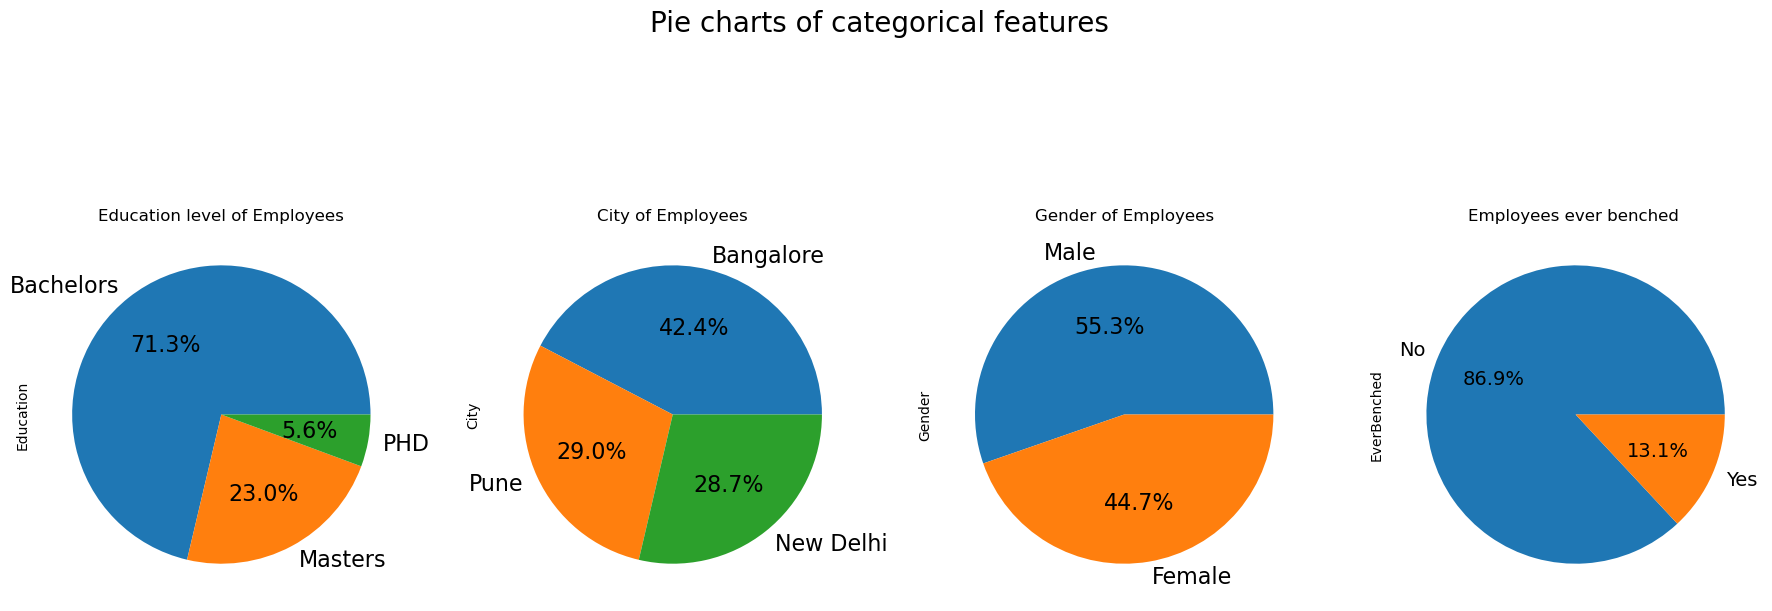

In [25]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(18,8))

pie1=pd.DataFrame(employee_df['Education'].value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Education level of Employees',y = 'Education', 
             autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=16, ax=ax1)

pie2=pd.DataFrame(employee_df['City'].value_counts())
pie2.reset_index(inplace=True)
pie2.plot(kind='pie', title='City of Employees',y = 'City', 
             autopct='%1.1f%%', shadow=False, labels=pie2['index'], legend = False, fontsize=16, ax=ax2)

pie3=pd.DataFrame(employee_df['Gender'].value_counts())
pie3.reset_index(inplace=True)
pie3.plot(kind='pie', title='Gender of Employees',y = 'Gender', 
             autopct='%1.1f%%', shadow=False, labels=pie3['index'], legend = False, fontsize=16, ax=ax3)

pie4=pd.DataFrame(employee_df['EverBenched'].value_counts())
pie4.reset_index(inplace=True)
pie4.plot(kind='pie', title='Employees ever benched ',y = 'EverBenched', 
             autopct='%1.1f%%', shadow=False, labels=pie4['index'], legend = False, fontsize=14, ax=ax4)

fig.suptitle('Pie charts of categorical features', fontsize=20)
fig.tight_layout()


In [26]:
# Define the variable names, colors, and titles for the pie charts
pie_vars = {
    'Education': {'title': 'Education Level of Employees'},
    'City': {'title': 'City of Employees'},
    'Gender': {'title': 'Gender of Employees'},
    'EverBenched': {'title': 'Employees Ever Benched'}
}

# Loop through the variables and create pie charts
for var, attr in pie_vars.items():
    fig = px.pie(employee_df, names=var, title=attr['title'])
    fig.update_traces(textinfo='percent+label')
    fig.show()

In [27]:
# Define the variable names, colors, and titles for the histograms
hist_vars = {
    'JoiningYear': {'color': 'red', 'title': 'JoiningYear Distribution'},
    'PaymentTier': {'color': 'blue', 'title': 'PaymentTier Distribution'},
    'Age': {'color': 'green', 'title': 'Age Distribution'},
    'ExperienceInCurrentDomain': {'color': 'yellow', 'title': 'ExperienceInCurrentDomain Distribution'}
}

# Loop through the variables and create histograms
for var, attr in hist_vars.items():
    fig = go.Figure()
    hist_data = np.histogram(employee_df[var], bins=20)
    fig.add_trace(go.Bar(x=hist_data[1][:-1], y=hist_data[0], marker_color=attr['color'], name=attr['title'],
                         text=hist_data[0],
                         textposition='auto'))

    # Update the layout and axis titles
    fig.update_layout(
        title=attr['title'],
        xaxis_title="Value",
        yaxis_title="Frequency",
        showlegend=False
    )

    # Show the plot
    fig.show()


In [28]:

# Bar chart for LeaveOrNot variable
fig = px.bar(employee_df['LeaveOrNot'].value_counts(), title='LeaveOrNot')
fig.update_layout(
    xaxis_title="LeaveOrNot",
    yaxis_title="Count",
    legend_title="Legend",
    legend=dict(x=1, y=1, traceorder="normal", font=dict(family="sans-serif",size=12,color="black"),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='LightSkyBlue'),
    showlegend=True,
    name='0: Employee has not left the company'))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='LightSkyBlue'),
    showlegend=True,
    name='1: Employee has left the company'))

fig.show()

# Bivariate Analysis

Bivariate analysis is a statistical method that involves the **analysis of two variables to determine the empirical relationship between them.** It can be used to test hypotheses, identify trends and patterns, and explore associations between variables. There are several techniques that can be used for bivariate analysis, including scatter plots, correlation analysis, and regression analysis. 

In [29]:
# Create frequency distribution of 'Education' by gender
education_gender_counts = employee_df.groupby(['Education', 'Gender']).size().reset_index(name='count')

fig = go.Figure()

for gender, color in zip(education_gender_counts['Gender'].unique(), ['LightSkyBlue', 'MediumPurple']):
    subset = education_gender_counts[education_gender_counts['Gender'] == gender]
    
    fig.add_trace(go.Bar(
        x=subset['Education'],
        y=subset['count'],
        text=subset['count'],
        textposition='auto',
        name=gender,
        marker=dict(color=color)
    ))

fig.update_layout(
    title="Frequency Distribution of 'Education' by Gender",
    xaxis_title="Education Level",
    yaxis_title="Count",
    legend_title="Gender"
)

fig.show()


In [30]:
# Clustered Bar Chart: PaymentTier vs LeaveOrNot
payment_leave_counts = employee_df.groupby(['PaymentTier', 'LeaveOrNot']).size().reset_index(name='count')

fig = go.Figure()

for leave, color in zip(payment_leave_counts['LeaveOrNot'].unique(), ['LightSkyBlue', 'MediumPurple']):
    subset = payment_leave_counts[payment_leave_counts['LeaveOrNot'] == leave]
    
    fig.add_trace(go.Bar(
        x=subset['PaymentTier'],
        y=subset['count'],
        text=subset['count'],
        textposition='auto',
        name=str(leave),
        marker=dict(color=color)
    ))

fig.update_layout(
    title='PaymentTier vs LeaveOrNot',
    xaxis_title="PaymentTier",
    yaxis_title="Count",
    legend_title="LeaveOrNot"
)

fig.show()


In [31]:
import plotly.graph_objects as go

# Clustered Bar Chart: JoiningYear vs LeaveOrNot
joining_leave_counts = employee_df.groupby(['JoiningYear', 'LeaveOrNot']).size().reset_index(name='count')

fig = go.Figure()

colors = ['rgb(25, 155, 255)', 'rgb(255, 91, 71)']

for leave, color in zip(joining_leave_counts['LeaveOrNot'].unique(), colors):
    subset = joining_leave_counts[joining_leave_counts['LeaveOrNot'] == leave]
    
    fig.add_trace(go.Bar(
        x=subset['JoiningYear'],
        y=subset['count'],
        text=subset['count'],
        textposition='auto',
        name=str(leave),
        marker=dict(color=color)
    ))

fig.update_layout(
    title='JoiningYear vs LeaveOrNot',
    xaxis_title="JoiningYear",
    yaxis_title="Count",
    legend_title="LeaveOrNot"
)

fig.show()

In [32]:
# Histogram: Age distribution by LeaveOrNot
fig3 = px.histogram(employee_df, x='Age', color='LeaveOrNot', nbins=20, title='Age Distribution by LeaveOrNot')
fig3.show()

In [33]:
# Histogram: ExperienceInCurrentDomain distribution by LeaveOrNot
exp_leave_counts = employee_df.groupby(['ExperienceInCurrentDomain', 'LeaveOrNot']).size().reset_index(name='count')

fig = go.Figure()

colors = ['rgb(76, 175, 80)', 'rgb(244, 67, 54)']

for leave, color in zip(exp_leave_counts['LeaveOrNot'].unique(), colors):
    subset = exp_leave_counts[exp_leave_counts['LeaveOrNot'] == leave]
    
    fig.add_trace(go.Bar(
        x=subset['ExperienceInCurrentDomain'],
        y=subset['count'],
        text=subset['count'],
        textposition='auto',
        name=str(leave),
        marker=dict(color=color)
    ))

fig.update_layout(
    title='ExperienceInCurrentDomain Distribution by LeaveOrNot',
    xaxis_title="Experience In Current Domain",
    yaxis_title="Count",
    legend_title="LeaveOrNot"
)

fig.show()


The code below creates a correlation heatmap to visualize the pairwise correlation between numerical variables in the employee data frame. This is a form of bivariate analysis, which involves the analysis of two variables to determine the empirical relationship between them.

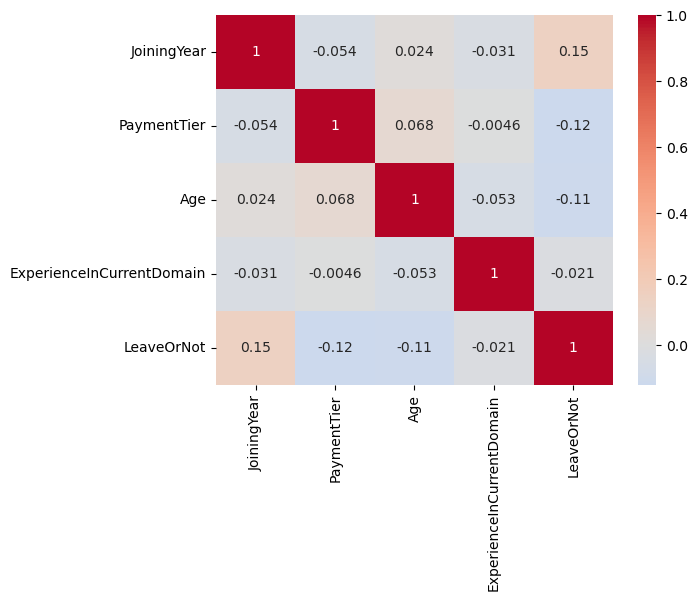

In [34]:
# Calculate the correlation matrix
corr_matrix = employee_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

**The heatmap above describes the correlation between various numeric variables in the dataset, including JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, and LeaveOrNot.**

The correlation matrix provides insight into the linear relationships between these variables, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation). A value close to 0 indicates a weak or no correlation.

**JoiningYear:**
**JoiningYear has a positive correlation with LeaveOrNot (0.15)**, suggesting that employees who joined the company more recently are slightly more likely to leave the company. On the other hand, **it has a weak negative correlation with PaymentTier (-0.05)**, which implies that employees who joined more recently are slightly more likely to be in lower payment tiers.

**PaymentTier:**
**PaymentTier has a negative correlation with LeaveOrNot (-0.12),** indicating that employees in higher payment tiers are less likely to leave the company. **PaymentTier shows weak correlations with Age (0.07)** and **ExperienceInCurrentDomain (-0.004),** suggesting that these factors do not have a strong linear relationship with an employee's payment tier.

**Age:**
**Age has a weak negative correlation with ExperienceInCurrentDomain (-0.05),** indicating that as employees get older, they tend to have slightly less experience in their current domain. **Age shows a weak negative correlation with LeaveOrNot (-0.11),** suggesting that older employees are slightly less likely to leave the company.

**ExperienceInCurrentDomain:**
**ExperienceInCurrentDomain has a weak negative correlation with LeaveOrNot (-0.02),** indicating that employees with more experience in their current domain are slightly less likely to leave the company.

This suggests that employees who have developed expertise within their roles are more likely to stay with the organization. The Company may want to focus on opportunities for skill development and career advancement to encourage employee retention.

**Now let's investigate whether there maybe evidence of multicollinearity**

Multicollinearity occurs when two or more independent variables in a dataset are highly correlated, which can lead to unreliable and unstable estimates in regression analysis. When examining the correlation matrix, we are looking for correlation coefficients that are close to -1 or 1, as this would indicate a strong linear relationship between the variables.

**There is no evidence of multicollinearity among the variables in this correlation matrix, as none of the coefficients are close to -1 or 1. The highest absolute correlation value is 0.150649585 (between JoiningYear and LeaveOrNot), which indicates a weak positive relationship. The remaining coefficients are also weak, ranging from -0.11989133 to 0.067514197.**

Given the weak correlations in the matrix, it is unlikely that multicollinearity is a concern in this dataset.

# Multivariate Analysis

In [35]:
# Load the data
url = "https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/employee.csv"
employee_df = pd.read_csv(url)


In [36]:
# Clustered Bar Chart: PaymentTier vs LeaveOrNot, grouped by JoiningYear
fig1 = px.histogram(employee_df, x='PaymentTier', y='LeaveOrNot', color='LeaveOrNot',
                    histfunc='count', nbins=3,
                    facet_col='JoiningYear', facet_col_wrap=3,
                    barmode='group',
                    title='PaymentTier vs LeaveOrNot, Grouped by JoiningYear')
fig1.show()

The given code below creates a pair plot using the pairplot function from the seaborn library. A pair plot is a type of multivariate analysis that displays the relationships between multiple pairs of variables in a dataset. In this case, the pair plot is created for the numerical variables in the employee_df DataFrame, with the hue set to the LeaveOrNot column. This means that the data points in the plot will be colored based on their LeaveOrNot value.

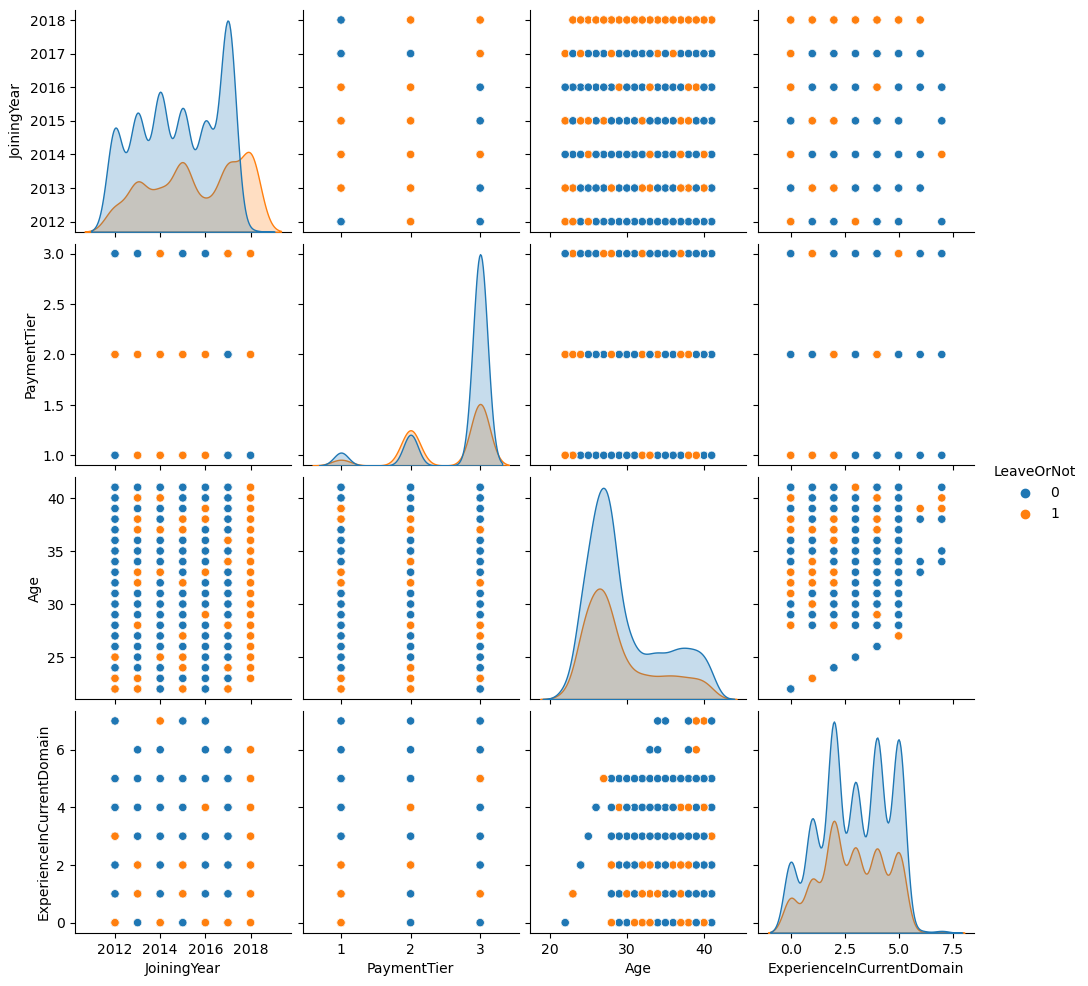

In [37]:
# Pair plot for numerical variables
sns.pairplot(employee_df, hue='LeaveOrNot')

In [38]:
employee_df.head(5)

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

# Feature Engineering 

Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

It involves selecting, transforming, extracting, combining, and manipulating raw data to generate the desired variables for analysis or predictive modeling. It is a crucial step in developing a machine learning model.

Domain knowledge refers to the understanding and expertise of a specific field or industry that a data scientist or analyst possesses. This knowledge helps them make informed decisions when working with data, creating new features, and building machine learning models. In the context of feature engineering, domain knowledge allows the data scientist to identify relevant variables, understand the relationships between them, and create new, meaningful features that can improve the performance of a machine learning model.

To enhance the feature engineering process, you can consider the following 
techniques and transformations:

# Encoding

Encoding is the process of converting data from one format to another. In the context of machine learning and data analysis, encoding often refers to the process of converting categorical data into numerical data that can be used in a model. There are several methods for encoding categorical data, including one-hot encoding, label encoding, and binary encoding.
<br><br>
Encoding is an important step in preparing data for machine learning algorithms, as many algorithms cannot handle categorical data in its raw form and the choice of a method depends on the specific problem at hand. 



### One Hot Encoding
One-hot encoding is a technique used to convert categorical variables into binary (dummy) variables, which take the values 0 or 1. 
Each category within a categorical variable is represented by a separate binary variable, indicating the presence or absence of that category in an observation.

For example, for the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is 'female' or 0 otherwise, or we can generate the variable "male", which takes 1 if the person is 'male' and 0 otherwise.

**Example: Encoding Gender, Education, City,  Variables**
For the categorical variable "Gender", with labels 'female' and 'male', we can generate a binary variable "female", which takes 1 if the person is 'female' or 0 otherwise, or we can generate a binary variable "male", which takes 1 if the person is 'male' and 0 otherwise.

**Education**
['Bachelors', 'Masters', 'PHD']
Categories (3, object): ['Bachelors', 'Masters', 'PHD']


**City**
['Bangalore', 'New Delhi', 'Pune']
Categories (3, object): ['Bangalore', 'New Delhi', 'Pune']

For the categorical variable "colour" with values 'red', 'blue' and 'green', we can create 3 new variables called "red", "blue" and "green". These variables will take the value 1, if the observation is of the said colour or 0 otherwise. 


### Encoding into k-1 dummy variables

Note however, that for the variable "colour", by creating 2 binary variables, say "red" and "blue", we already encode **ALL** the information:

- if the observation is red, it will be captured by the variable "red" (red = 1, blue = 0)
- if the observation is blue, it will be captured by the variable "blue" (red = 0, blue = 1)
- if the observation is green, it will be captured by the combination of "red" and "blue" (red = 0, blue = 0)

We do not need to add a third variable "green" to capture that the observation is green.

More generally, a categorical variable should be encoded by creating k-1 binary variables, where k is the number of distinct categories. In the case of gender, k=2 (male / female), therefore we need to create only 1 (k - 1 = 1) binary variable. In the case of colour, which has 3 different categories (k=3), we need to create 2 (k - 1 = 2) binary variables to capture all the information.

One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information: if the observation is 0 in all the binary variables, then it must be 1 in the final (not present) binary variable.

**When one hot encoding categorical variables, we create k - 1 binary variables**


Most machine learning algorithms, consider the entire data set while being fit. Therefore, encoding categorical variables into k - 1 binary variables, is better, as it avoids introducing redundant information.

### Advantages of one hot encoding

- Straightforward to implement
- Makes no assumption about the distribution or categories of the categorical variable
- Keeps all the information of the categorical variable
- Suitable for linear models

### Limitations

- Expands the feature space
- Does not add extra information while encoding
- Many dummy variables may be identical, introducing redundant information

In [39]:
employee_df

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDomain  LeaveOrNot  
0                             0           0  
1                             3           1  
2                             2           0  
3                             5           1  
4                             2           1  
...                         ...         ...  
4648                          4           0  
4649                          2           1  
4650                          5           1  
4651                          2           0  
4652                          4           0  

[4653 rows x 9 columns]

**The 'PaymentTier' feature already has values of 1, 2, and 3, hence there is no need to apply ordinal encoding.**
<br>In this case, the feature is already in a suitable numerical format for machine learning algorithms. Ordinal encoding is necessary when the values of an ordinal feature are in a non-numeric format, such as strings
(ordinal_encoding_payment_tier = **{'Tier 1': 1,'Tier 2': 2,'Tier 3': 3}** or labels that indicate an order or rank.

In [40]:
# One-hot encoding of City and Education
cat_features = ['City', 'Education']
employee_df = pd.get_dummies(employee_df, columns=cat_features, drop_first=True)

# Binarizing Gender and EverBenched features:
employee_df['Gender'] = employee_df['Gender'].replace('Male', 1).replace('Female', 0)
employee_df['EverBenched'] = employee_df['EverBenched'].replace('Yes', 1).replace('No', 0)

The **'pd.get_dummies()' function is used to one-hot encode the 'City' feature in the 'employee_df' DataFrame.** 
<br><br>**The 'columns' parameter is set to 'cat_features', which indicates that only the 'City' column will be one-hot encoded.**<br><br>
**The 'drop_first=True' parameter ensures that the first category for the 'City' feature is dropped, to avoid multicollinearity.**

When one-hot encoding is applied to a categorical feature, it creates a new binary feature for each category in the original feature. However, including all of these binary features in a model can lead to multicollinearity, which is when two or more features are highly correlated. In the presence of multicollinearity, it becomes difficult for the model to determine the individual effect of each feature on the target variable, as they can be easily explained by other correlated features. This can lead to unstable estimates and reduced interpretability of the model.

**To avoid multicollinearity, one common practice is to drop one of the binary features created during one-hot encoding.** The rationale behind this is that if all other categories have a value of 0, the dropped category is implicitly represented as 1. For example, **when one-hot encoding the 'City' feature with categories 'Bangalore', 'Pune', and 'New Delhi', we create three binary features: 'City_Bangalore', 'City_Pune', and 'City_New Delhi'. By dropping the first category (e.g., 'City_Bangalore'), we can still infer its value based on the other two categories. If 'City_Pune' and 'City_New Delhi' are both 0, it means the city must be 'Bangalore'.**

In the code, the **'drop_first=True'** parameter in the **'pd.get_dummies()'** function is used to drop the first category of the **'City' feature.** This helps to prevent multicollinearity by reducing the number of correlated binary features in the model.

In [41]:
employee_df

JoiningYear  PaymentTier  Age  Gender  EverBenched  \
0            2017            3   34       1            0   
1            2013            1   28       0            0   
2            2014            3   38       0            0   
3            2016            3   27       1            0   
4            2017            3   24       1            1   
...           ...          ...  ...     ...          ...   
4648         2013            3   26       0            0   
4649         2013            2   37       1            0   
4650         2018            3   27       1            0   
4651         2012            3   30       1            1   
4652         2015            3   33       1            1   

      ExperienceInCurrentDomain  LeaveOrNot  City_New Delhi  City_Pune  \
0                             0           0               0          0   
1                             3           1               0          1   
2                             2           0               1          0   
3                             5           1               0          0   
4                             2           1               0          1   
...                         ...         ...             ...        ...   
4648                          4           0               0          0   
4649                          2           1               0          1   
4650                          5           1               1          0   
4651                          2           0               0          0   
4652                          4           0               0          0   

      Education_Masters  Education_PHD  
0                     0              0  
1                     0              0  
2                     0              0  
3                     1              0  
4                     1              0  
...                 ...            ...  
4648                  0              0  
4649                  1              0  
4650                  1              0  
4651                  0              0  
4652                  0              0  

[4653 rows x 11 columns]

# Feature Selection

Feature selection is the process of selecting a subset of relevant features for use in model construction. **This can involve techniques such as Chi-squared test: Correlation Matrix and Logistics Regression Feature Importance.** 

**Chi-squared test:** we are going to use this test to determine the relationship between **categorical features ('Education', 'City', 'PaymentTier', 'Gender', 'EverBenched')** and the **target variable ('LeaveOrNot')**. The p-values resulting from the chi-squared test  will show the significance of the association between each categorical feature and the target variable. 
**Lower p-values indicate a stronger relationship.** (NB:A p-value is a measure of the evidence against a null hypothesis.)

**Correlation matrix:** For **numerical features ('JoiningYear', 'Age', 'ExperienceInCurrentDomain')**, we will calculate the correlation matrix to identify the linear relationships among these features. This method helps to assess the potential for multicollinearity, which can cause issues in linear models like logistic regression.

**Logistic regression feature importance:**
This Regression Analysis will be used for estimating the relationship between a dependent variable (a.k.a the outcome, or target variable) and one or more independent variables (a.k.a predictors, covariates, explanatory variables, or features.

Thus, we will use logistic regression as a model-based feature selection technique. By fitting a logistic regression model to the data, we can examine the coefficients associated with each feature. **Larger absolute values of the coefficients indicate a more significant impact on the model's prediction.** This analysis helps in understanding which features are the most important when predicting the target variable.

The goal of feature selection is to reduce the dimensionality of the data and improve model performance by removing irrelevant or redundant features.

Chi-squared test p-values for categorical features:
City_New Delhi       4.868372e-02
Education_PHD        9.200673e-03
PaymentTier          4.079040e-06
EverBenched          4.016083e-07
Education_Masters    3.128726e-19
Gender               1.216743e-21
City_Pune            3.526349e-33
dtype: float64

Correlation matrix for numerical features:
                           JoiningYear       Age  ExperienceInCurrentDomain
JoiningYear                   1.000000  0.013165                  -0.036525
Age                           0.013165  1.000000                  -0.134643
ExperienceInCurrentDomain    -0.036525 -0.134643                   1.000000


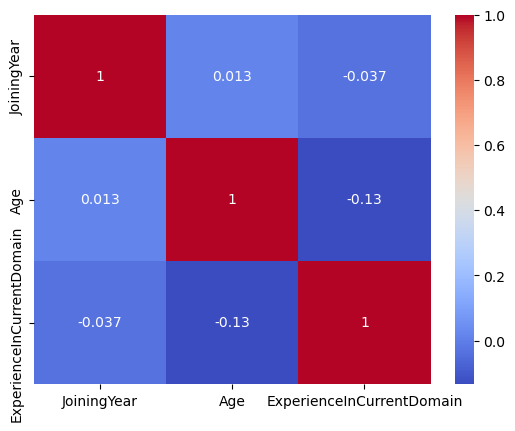


Feature importance using logistic regression:
Education_Masters            0.772361
City_Pune                    0.711685
EverBenched                  0.573131
JoiningYear                  0.351787
Education_PHD               -0.006417
Age                         -0.079001
ExperienceInCurrentDomain   -0.082824
PaymentTier                 -0.314216
City_New Delhi              -0.512243
Gender                      -0.903554
dtype: float64


In [42]:
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Divide the given list into categorical and numerical features
categorical_features = ['City_New Delhi', 'City_Pune', 'Education_Masters', 
                        'Education_PHD', 'PaymentTier', 'Gender', 'EverBenched']

numerical_features = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']

# Perform chi-squared test for categorical features
X_cat = employee_df[categorical_features]
y = employee_df['LeaveOrNot']
chi_scores = chi2(X_cat, y)

# Display chi-squared test results in a dataframe
p_values = pd.Series(chi_scores[1], index=categorical_features)
p_values.sort_values(ascending=False, inplace=True)
print("Chi-squared test p-values for categorical features:")
print(p_values)

# Calculate the correlation matrix for numerical features
corr_matrix = employee_df[numerical_features].corr()
print("\nCorrelation matrix for numerical features:")
print(corr_matrix)

# Plot the correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Feature importance using logistic regression
X_num = employee_df[numerical_features]
X = pd.concat([X_cat, X_num], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Train a logistic regression model
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Display feature importance
feature_importance = pd.Series(logreg.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print("\nFeature importance using logistic regression:")
print(feature_importance)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_importance.index, 'Importance': feature_importance.values})

# Visualize the feature importances using Plotly Express
fig = px.bar(importance_df, x='Feature', y='Importance', title='Feature Importance using Logistic Regression')
fig.show()


**Below is the Report based on the Results from the Chi-squared test, Correlation matrix, and Logistic regression feature importance:**

**Chi-squared Test for Categorical Features:**
The chi-squared test is used to determine whether there is a significant relationship between two categorical variables. In this case, we are testing the relationship between each categorical feature and the target variable 'LeaveOrNot'.

**The p-values from the test are as follows:**

- City_Pune: 3.53e-33
- Gender: 1.22e-21
- Education_Masters: 3.13e-19
- EverBenched: 4.02e-07
- PaymentTier: 4.08e-06
- Education_PHD: 9.20e-03
- City_New Delhi: 4.87e-02

**Lower p-values indicate stronger relationships between the categorical feature and the target variable.** In this case, **'City_Pune' and 'Gender' have the lowest p-values, suggesting that these features have the strongest relationships with the target variable.** On the other hand, 'City_New Delhi' has the highest p-value, indicating a weaker relationship with the target variable.

Correlation Matrix for Numerical Features:
The correlation matrix shows the correlation coefficients between numerical features. These coefficients range from -1 to 1, with values close to -1 or 1 indicating strong negative or positive correlations, respectively, and values close to 0 indicating weak or no correlation.
*********************************************************************************
JoiningYear has a weak positive correlation with Age (0.013) and a weak negative correlation with ExperienceInCurrentDomain (-0.037).
Age has a weak negative correlation with ExperienceInCurrentDomain (-0.135). Therefore, the numerical features have weak correlations with each other.
*******************************************************************************************************
**Logistic Regression Feature Importance:**
The logistic regression model assigns a coefficient to each feature, which indicates the strength and direction of the relationship between the feature and the target variable. Positive coefficients suggest that an increase in the feature value leads to an increased probability of the target variable being 1 (employee leaving), while negative coefficients suggest the opposite.

- City_Pune: 0.712 (positive relationship)
- Education_Masters: 0.772 (positive relationship)
- EverBenched: 0.573 (positive relationship)
- JoiningYear: 0.352 (positive relationship)

- Education_PHD: -0.006 (negative relationship)
- Age: -0.079 (negative relationship)
- ExperienceInCurrentDomain: -0.083 (negative relationship)
- PaymentTier: -0.314 (negative relationship)
- City_New Delhi: -0.512 (negative relationship)
- Gender: -0.904 (negative relationship)

**Based on the logistic regression model, 'Gender' has the strongest negative relationship with the target variable, indicating that a change in gender has a significant impact on the likelihood of an employee leaving.**

**'Education_Masters' and 'City_Pune' have the strongest positive relationships, suggesting that having a master's degree and being located in Pune also have notable effects on the target variable.** 
<br>Other features such as 'EverBenched', 'JoiningYear', and 'PaymentTier' also show moderate relationships with the target variable.

**Our Inference:**
**Taking into account the results from the chi-squared test, correlation matrix, and logistic regression feature importance, we can conclude that 'City_Pune', 'Gender', 'Education_Masters', and 'EverBenched' are the most important features for predicting whether an employee will leave or not.**

Furthermore, 'PaymentTier' is a categorical variable representing different levels or categories of payment for employees. Its negative relationship implies that higher payment tiers are associated with a lower likelihood of employees leaving the company.

We can, therefore, include 'PaymentTier' among the selected features ('City_Pune', 'Gender','Education_Masters', and 'EverBenched') for your logistic regression model. The chi-squared test and the logistic regression feature importance analysis both suggest that 'PaymentTier' is significantly related to the target variable 'LeaveOrNot', and can potentially help improve the predictive performance of the model.

Adding 'PaymentTier' to the list of selected features would help capture the relationship between the different payment levels and employee attrition, providing additional information to the model. This comprehensive set of features, which also includes 'City_Pune', 'Gender', 'Education_Masters', and 'EverBenched', will allow the model to account for various factors that influence an employee's decision to leave or stay with the company.

Consequently, by considering the findings from the chi-squared test, correlation matrix, and logistic regression feature importance, we have identified 'City_Pune', 'Gender', 'Education_Masters', 'EverBenched', and 'PaymentTier' as the most important features for predicting employee attrition. Incorporating these features into your logistic regression model will improve its predictive performance and help you better understand the factors that drive employee turnover.

# Training and Testing (Validating) the Models

**Models to be used:**

**Part1**
- Logistic Regression
- Logistic Lasso
- Logistic Ridge 

**Part2**
- Support Vector Machine (SVM)
- Random Forest: RandomForestClassifier
- Gradient Boosting': GradientBoostingClassifier(),
- KNN: KNeighborsClassifier(), and 
- Naive Bayes': GaussianNB()


In [45]:
employee_df.head(3)

JoiningYear  PaymentTier  Age  Gender  EverBenched  \
0         2017            3   34       1            0   
1         2013            1   28       0            0   
2         2014            3   38       0            0   

   ExperienceInCurrentDomain  LeaveOrNot  City_New Delhi  City_Pune  \
0                          0           0               0          0   
1                          3           1               0          1   
2                          2           0               1          0   

   Education_Masters  Education_PHD  
0                  0              0  
1                  0              0  
2                  0              0

In [46]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

label=employee_df['LeaveOrNot']

# Create the interaction feature
employee_df['GenderEverBenched'] = employee_df['Gender'] * employee_df['EverBenched']

# Separate the features and target variable
features = employee_df.drop('LeaveOrNot', axis=1)
target = employee_df['LeaveOrNot']

# Split the dataset into training and validation (testing) sets
X_train, X_val, label_train, label_val = train_test_split(features, target, test_size=0.20, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shapes:", X_train.shape, label_train.shape)
print("Validation set shapes:", X_val.shape, label_val.shape)

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation (testing) data using the same scaler
X_val_scaled = scaler.transform(X_val)

# Now, X_train_scaled and X_val_scaled are the standardized versions of 
# the training and validation datasets


Training set shapes: (3722, 11) (3722,)
Validation set shapes: (931, 11) (931,)


Classification report for Logistic:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       610
           1       0.71      0.43      0.54       321

    accuracy                           0.74       931
   macro avg       0.73      0.67      0.68       931
weighted avg       0.74      0.74      0.72       931

Classification report for Logistic Lasso:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       610
           1       0.71      0.43      0.54       321

    accuracy                           0.74       931
   macro avg       0.73      0.67      0.68       931
weighted avg       0.74      0.74      0.72       931

Classification report for Logistic Ridge:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       610
           1       0.70      0.43      0.53       321

    accuracy                           0.74       931
   macro

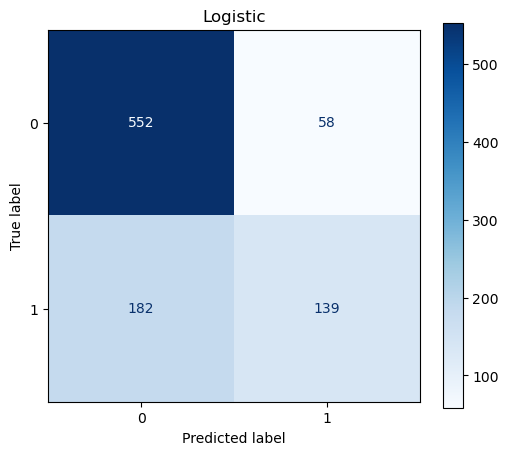

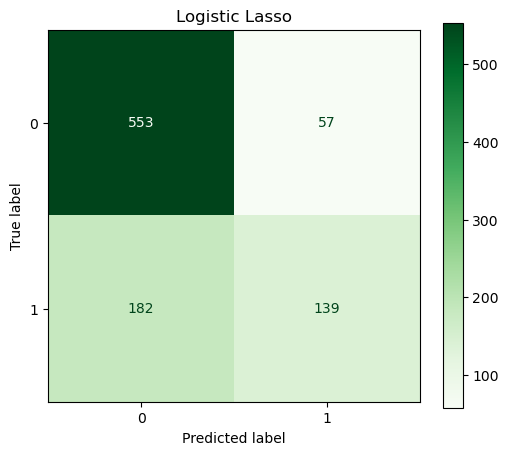

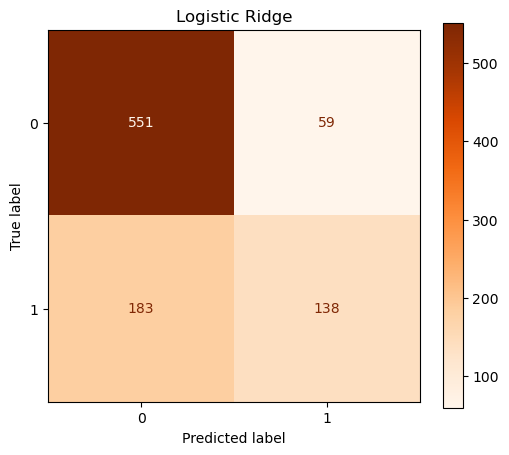

In [48]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, precision_recall_fscore_support, 
accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

# Fit logistic regression models
logreg = LogisticRegression(solver='liblinear').fit(X_train_scaled, label_train)
logreg_l1 = LogisticRegressionCV(Cs=15, cv=4, penalty='l1', solver='liblinear').fit(X_train_scaled, label_train)
logreg_l2 = LogisticRegressionCV(Cs=15, cv=4, penalty='l2', solver='liblinear').fit(X_train_scaled, label_train)

# Store predictions and probabilities
model_names = ['Logistic', 'Logistic Lasso', 'Logistic Ridge']
models = [logreg, logreg_l1, logreg_l2]
predictions = []
probabilities = []

for model in models:
    predictions.append(pd.Series(model.predict(X_val_scaled)))
    probabilities.append(pd.Series(model.predict_proba(X_val_scaled).max(axis=1)))

predictions = pd.concat(predictions, axis=1, keys=model_names)
probabilities = pd.concat(probabilities, axis=1, keys=model_names)

# Display classification reports
for name, prediction in predictions.iteritems():
    print(f'Classification report for {name}:')
    print(classification_report(label_val, prediction))

# Define colormap for each classifier
cmaps = {
    'Logistic': 'Blues',
    'Logistic Lasso': 'Greens',
    'Logistic Ridge': 'Oranges'
}

# Calculate metrics
metrics = []
conf_matrices = {}

for name, prediction in predictions.iteritems():
    precision, recall, fscore, _ = precision_recall_fscore_support(label_val, prediction, average='weighted')
    accuracy = accuracy_score(label_val, prediction)
    auc = roc_auc_score(label_binarize(label_val, classes=[0, 1]),
                        label_binarize(prediction, classes=[0, 1]), 
                        average='weighted')
    conf_matrices[name] = confusion_matrix(label_val, prediction)
    metrics.append(pd.Series({'precision': precision, 'recall': recall, 'fscore': fscore, 'accuracy':
                              accuracy, 'auc': auc}, name=name))

metrics = pd.concat(metrics, axis=1)

for name in model_names:
    # Display confusion matrix with specified colormap
    fig, ax = plt.subplots(figsize=(6, 5))
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrices[name], display_labels=models[0].classes_)
    display.plot(cmap=cmaps[name], ax=ax)
    ax.set_title(name)
    plt.show()

This is a comparative analysis of three classification models applied to the employee_df dataset: Logistic Regression, Lasso Regression (L1 Regularization), and Ridge Regression (L2 Regularization). The performance of each model is evaluated using their confusion matrices, which display the number of true positives, true negatives, false positives, and false negatives.

**When comparing the three models, we can observe the following insights:** 
**All three models have the same accuracy of 0.74.**
***********************************************************************************
**The Lasso Regression model has the highest number of True Negatives (553)** and the lowest number of False Positives (57), which indicates that **it is slightly better at predicting class 0 compared to the other models.**
The **Logistic Regression and Lasso Regression models both have the same number of True Positives (139) and False Negatives (182), indicating that they have similar performance in predicting class 1.**
********************************************************************************
The Ridge Regression model has the lowest number of True Positives (138) and the highest number of False Negatives (183), which suggests that it is slightly worse at predicting class 1 compared to the other models.

Conclusion:
Based on the analysis of the confusion matrices, the Logistic Lasso Regression model appears to have the best overall performance in terms of true predictions, closely followed by the Logistic Regression model. The Logistic Ridge Regression model demonstrates slightly lower performance in predicting class 1. 

Classification report for SVM:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       610
           1       0.92      0.61      0.73       321

    accuracy                           0.85       931
   macro avg       0.87      0.79      0.81       931
weighted avg       0.86      0.85      0.84       931



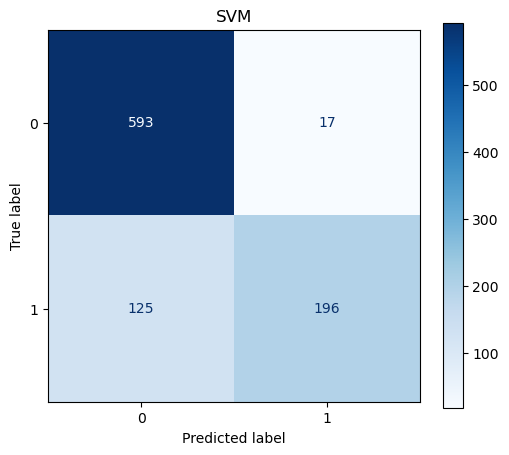

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       610
           1       0.82      0.73      0.78       321

    accuracy                           0.85       931
   macro avg       0.85      0.83      0.83       931
weighted avg       0.85      0.85      0.85       931



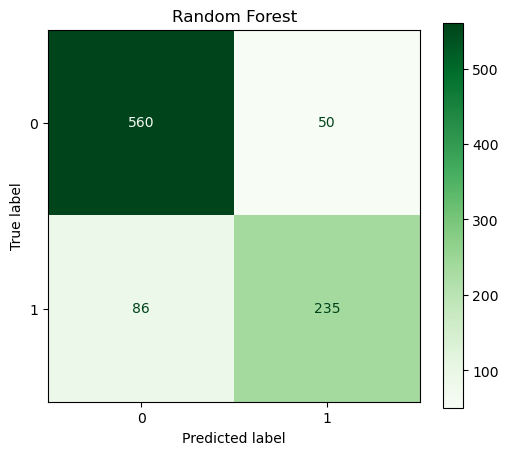

Classification report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       610
           1       0.88      0.67      0.76       321

    accuracy                           0.85       931
   macro avg       0.86      0.81      0.83       931
weighted avg       0.86      0.85      0.85       931



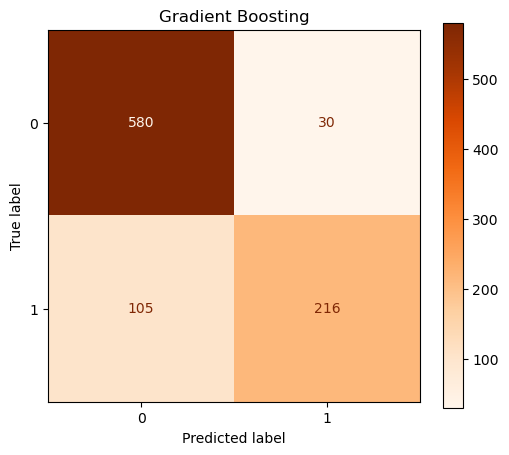

Classification report for KNN:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       610
           1       0.84      0.65      0.73       321

    accuracy                           0.84       931
   macro avg       0.84      0.79      0.81       931
weighted avg       0.84      0.84      0.83       931



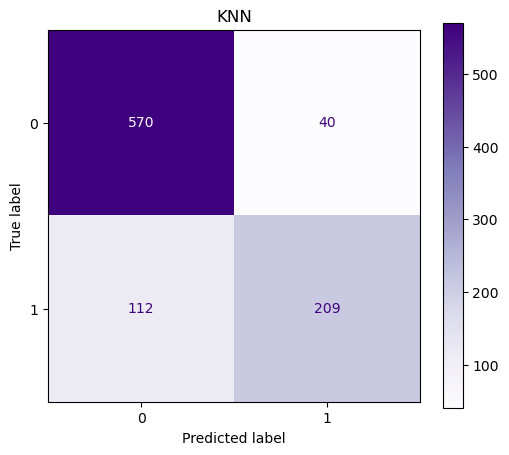

Classification report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       610
           1       0.59      0.58      0.58       321

    accuracy                           0.71       931
   macro avg       0.68      0.68      0.68       931
weighted avg       0.71      0.71      0.71       931



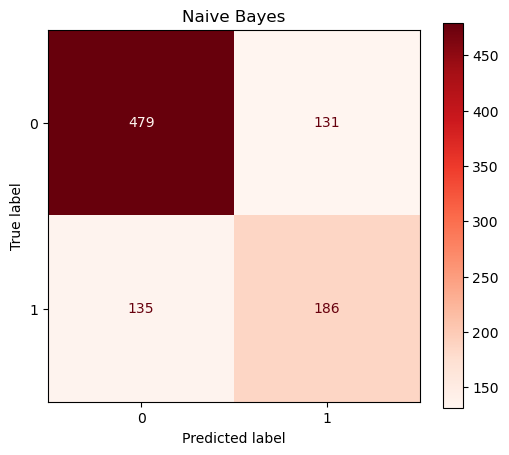

In [55]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define classifiers
classifiers = {
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}


# Define colormap for each classifier
cmaps = {
    'SVM': 'Blues',
    'Random Forest': 'Greens',
    'Gradient Boosting': 'Oranges',
    'KNN': 'Purples',
    'Naive Bayes': 'Reds'
}

# Train and evaluate classifiers
for name, classifier in classifiers.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', classifier)])
    pipeline.fit(X_train, label_train)
    prediction = pipeline.predict(X_val)
    print(f'Classification report for {name}:')
    print(classification_report(label_val, prediction))

    # Display confusion matrix with specified colormap
    conf_matrix = confusion_matrix(label_val, prediction)
    fig, ax = plt.subplots(figsize=(6, 5))
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.named_steps['classifier'].classes_)
    display.plot(cmap=cmaps[name], ax=ax)
    ax.set_title(name)
    plt.show()

When comparing the five models based on precision, recall, and F1-score, we observe that the Support Vector Machines (SVM), Random Forest, and Gradient Boosting models perform similarly, with an accuracy of 0.85. These three models also exhibit the highest weighted average F1-scores of 0.84, 0.84, and 0.85, respectively.

The K-Nearest Neighbors (KNN) model performs slightly worse than the top three models, with an accuracy of 0.84 and a weighted average F1-score of 0.83. However, it still outperforms the Naive Bayes model, which has an accuracy of 0.71 and a weighted average F1-score of 0.71.

In terms of class-specific performance, the SVM model has the highest precision for class 1 (0.92), while the Gradient Boosting model has the highest precision for class 0 (0.85). Random Forest has the highest recall for class 1 (0.72), while SVM has the highest recall for class 0 (0.97).

Conclusion:
Based on the analysis, the Support Vector Machines (SVM), Random Forest, and Gradient Boosting models exhibit the best performance in this classification task. Each model has its own strengths in terms of precision and recall, depending on the class of interest. However, it is important to consider the specific use case and the trade-offs between precision and recall when selecting the best model for a given application. **In cases where a balance between precision and recall is desired, the Gradient Boosting model may be preferred due to its higher macro average F1-score (0.83) compared to SVM and Random Forest models.**

## Hyperparameter Tuning for Classification Models

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Classification report for SVM:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       610
           1       0.91      0.66      0.76       321

    accuracy                           0.86       931
   macro avg       0.88      0.81      0.83       931
weighted avg       0.87      0.86      0.85       931



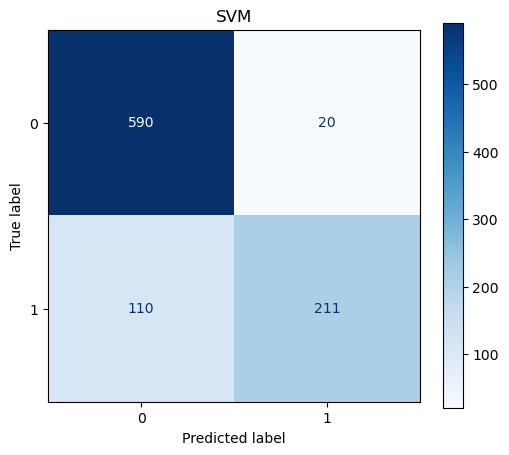

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91       610
           1       0.91      0.69      0.78       321

    accuracy                           0.87       931
   macro avg       0.88      0.82      0.84       931
weighted avg       0.87      0.87      0.86       931



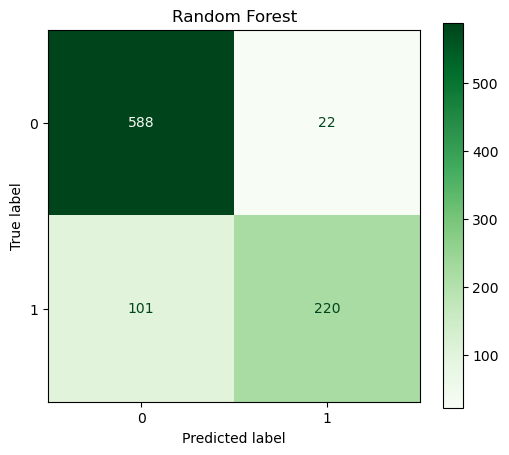

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Classification report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       610
           1       0.91      0.69      0.78       321

    accuracy                           0.87       931
   macro avg       0.88      0.83      0.84       931
weighted avg       0.87      0.87      0.86       931



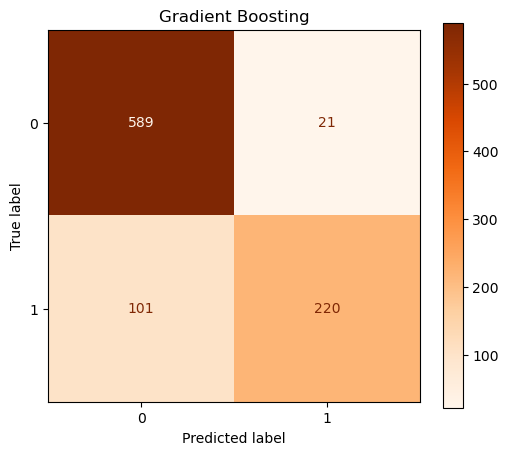

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Classification report for KNN:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       610
           1       0.83      0.66      0.74       321

    accuracy                           0.84       931
   macro avg       0.84      0.79      0.81       931
weighted avg       0.84      0.84      0.83       931



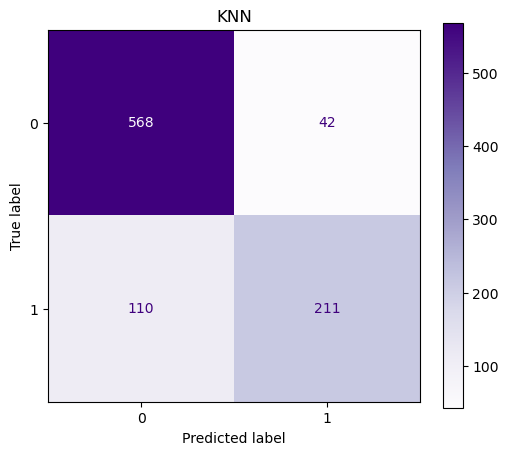

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Classification report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       610
           1       0.59      0.58      0.58       321

    accuracy                           0.71       931
   macro avg       0.68      0.68      0.68       931
weighted avg       0.71      0.71      0.71       931



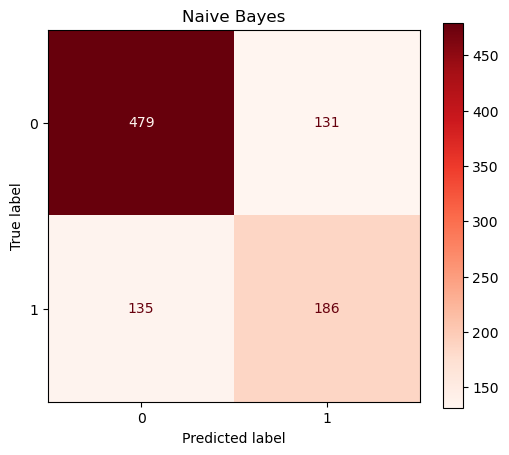

SVM:
  Best accuracy: 0.8364
  Best parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

Random Forest:
  Best accuracy: 0.8495
  Best parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}

Gradient Boosting:
  Best accuracy: 0.8490
  Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}

KNN:
  Best accuracy: 0.7990
  Best parameters: {'classifier__algorithm': 'brute', 'classifier__n_neighbors': 11, 'classifier__weights': 'distance'}

Naive Bayes:
  Best accuracy: 0.6924
  Best parameters: {'classifier__var_smoothing': 1e-09}

Model selection results (using accuracy as the metric):
SVM: 0.860
Random Forest: 0.868
Gradient Boosting: 0.869
KNN: 0.837
Naive Bayes: 0.714

The best model is: Gradient Boosting with an average accurac

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Define colormap for each classifier
cmaps = {
    'SVM': 'Blues',
    'Random Forest': 'Greens',
    'Gradient Boosting': 'Oranges',
    'KNN': 'Purples',
    'Naive Bayes': 'Reds'
}

# Train and evaluate classifiers with cross-validated grid search
best_estimators = {}
best_scores = {}
best_params = {}

for name, classifier in classifiers.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', classifier)])
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, label_train)
    
    best_estimators[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    best_params[name] = grid_search.best_params_

    # Evaluate the classifiers on the validation set
    prediction = best_estimators[name].predict(X_val)
    print(f'Classification report for {name}:')
    print(classification_report(label_val, prediction))

    # Display confusion matrix with specified colormap
    conf_matrix = confusion_matrix(label_val, prediction)
    fig, ax = plt.subplots(figsize=(6, 5))
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                                     display_labels=best_estimators[name].named_steps['classifier'].classes_)
    display.plot(cmap=cmaps[name], ax=ax)
    ax.set_title(name)
    plt.show()

    # Save confusion matrix to CSV
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  columns=best_estimators[name].named_steps['classifier'].classes_, 
                                  index=best_estimators[name].named_steps['classifier'].classes_)
    conf_matrix_df.to_csv(f'{name}_confusion_matrix.csv', index_label='Actual\\Predicted')

# Print best hyperparameters and cross-validated scores for each classifier
for name in classifiers.keys():
    print(f"{name}:")
    print(f"  Best accuracy: {best_scores[name]:.4f}")
    print(f"  Best parameters: {best_params[name]}\n")

# Print model selection results
model_scores = {
    name: accuracy_score(label_val, estimator.predict(X_val))
    for name, estimator in best_estimators.items()
}

print("Model selection results (using accuracy as the metric):")
for model, score in model_scores.items():
    print(f"{model}: {score:.3f}")

# Select the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model = classifiers[best_model_name]
print(f"\nThe best model is: {best_model_name} with an average accuracy of {model_scores[best_model_name]:.3f}")

**Now let's evaluate the information above:**

Here, I will evaluate the performance of five different classification models: Support Vector Machines (SVM), Random Forest, Gradient Boosting, K-Nearest Neighbors (KNN), and Naive Bayes. We use grid search cross-validation with five folds to find the optimal hyperparameters for each model. The total number of fits for each model is as follows:

- SVM: 80 fits
- Random Forest: 720 fits
- Gradient Boosting: 1620 fits
- KNN: 200 fits
- Naive Bayes: 20 fits<br>
We assess the performance of each model on the validation set using precision, recall, F1-score, and accuracy. The confusion matrix results are also provided for each model.
**************************************************************************
**SVM achieves an accuracy of 0.860, with the best parameters being C=10, gamma='scale', and kernel='rbf'. The classification report shows high precision and recall scores for both classes, with an F1-score of 0.90 for class 0 and 0.76 for class 1.**
*****************************************************************************
**Random Forest achieves an accuracy of 0.868, with the best parameters being max_depth=20, min_samples_leaf=2, min_samples_split=10, and n_estimators=50. The classification report demonstrates high precision and recall scores for both classes, with an F1-score of 0.91 for class 0 and 0.78 for class 1.**
****************************************************************************
**Gradient Boosting achieves the highest accuracy of 0.869, with the best parameters being learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, and n_estimators=50. The classification report reveals high precision and recall scores for both classes, with an F1-score of 0.91 for class 0 and 0.78 for class 1.**
***************************************************************************************
**KNN achieves an accuracy of 0.837, with the best parameters being algorithm='brute', n_neighbors=11, and weights='distance'. The classification report displays relatively high precision and recall scores for both classes, with an F1-score of 0.88 for class 0 and 0.74 for class 1.**
********************************************************************************
**Naive Bayes achieves the lowest accuracy of 0.714, with the best parameter being var_smoothing=1e-09. The classification report shows moderate precision and recall scores for both classes, with an F1-score of 0.78 for class 0 and 0.58 for class 1.**
****************************************************************
Conclusion

**The best model among the five tested classifiers is Gradient Boosting, with an average accuracy of 0.869.** It outperforms other models in terms of accuracy, and its F1-scores for both classes are among the highest. This suggests that Gradient Boosting is the most suitable model for this classification task.